In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pylab
import sys
from datetime import datetime, date, time
import numpy as np
from scipy.optimize import curve_fit

In [2]:
#read the file
df=pd.read_csv(r'C:\Users\ifue3702\Downloads\419003 (3).csv',
               skiprows=range(0,4),
               index_col=False,
               na_values="",
               names=['Date', 'Level', 'qual_level','Discharge_rate','qual_disch_rate','discharge_volume', 'qual_disch_level'])
#setting levels to 0
df['level_corrected']=df.Level-0.32
#remove na's
without_na=df.dropna(subset=['Level', 'Discharge_rate', 'discharge_volume'])
#remove 0's
this=without_na[without_na.Discharge_rate>0]
#Add column in Datetime format
this['Dates']=pd.to_datetime(this.Date)
#Defining some date thresholds (thus because of problems and deviation of data previous to 1936)
threshold=date(1935,12,31)
##Defining some date thresholds after 1975 due to lag in measurements
after_1975=date(1975,12,31)
#Spliting data depending on date thresholds
#after 1935
thus=this[this.Dates>threshold]

#between 1935 and 1975
#that=this[(this['Dates']>threshold) & (this['Dates']<=after_1978)]

#after 1975
Thot=this[this.Dates>after_1975]


#Consider to obtain rating curves
'''ploting all data at log scales

#plt.scatter(this.Discharge_rate, this.Level)
#plt.xlabel('Discharge Rate (ML/d)')
#plt.xscale('log')
#pylab.xlim(0.1,100000)
#plt.ylabel('Level (m)')
#plt.yscale('log')
#pylab.ylim(0.001,100)
#plt.savefig('Narrabri-RC(10).png')

#plot 1 figure with three subplots by date

#plt.figure(1)
#plt.subplot(221)
#plt.scatter(thus.Discharge_rate, thus.Level)
#plt.xlabel('Discharge Rate (ML/d)')
#plt.ylabel('Level (m)')
#plt.xscale('linear')

#plt.subplot(222)
#plt.scatter(thas.Discharge_rate, that.Level)
#plt.xlabel('Discharge Rate (ML/d)')
#plt.ylabel('Level (m)')
#plt.xscale('linear')

#plt.subplot(223)
plt.scatter(Thot.Discharge_rate, Thot.level_corrected)
plt.xlabel('Discharge Rate (ML/d)')
plt.ylabel('Level (m)')
plt.xscale('log')
pylab.xlim(0.1,100000)
plt.yscale('log')
pylab.ylim(0.001,100)
plt.grid(b=True, which='both', color='black')
plt.show()'''





C:\Users\ifue3702\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


"ploting all data at log scales\n\n#plt.scatter(this.Discharge_rate, this.Level)\n#plt.xlabel('Discharge Rate (ML/d)')\n#plt.xscale('log')\n#pylab.xlim(0.1,100000)\n#plt.ylabel('Level (m)')\n#plt.yscale('log')\n#pylab.ylim(0.001,100)\n#plt.savefig('Narrabri-RC(10).png')\n\n#plot 1 figure with three subplots by date\n\n#plt.figure(1)\n#plt.subplot(221)\n#plt.scatter(thus.Discharge_rate, thus.Level)\n#plt.xlabel('Discharge Rate (ML/d)')\n#plt.ylabel('Level (m)')\n#plt.xscale('linear')\n\n#plt.subplot(222)\n#plt.scatter(thas.Discharge_rate, that.Level)\n#plt.xlabel('Discharge Rate (ML/d)')\n#plt.ylabel('Level (m)')\n#plt.xscale('linear')\n\n#plt.subplot(223)\nplt.scatter(Thot.Discharge_rate, Thot.level_corrected)\nplt.xlabel('Discharge Rate (ML/d)')\nplt.ylabel('Level (m)')\nplt.xscale('log')\npylab.xlim(0.1,100000)\nplt.yscale('log')\npylab.ylim(0.001,100)\nplt.grid(b=True, which='both', color='black')\nplt.show()"

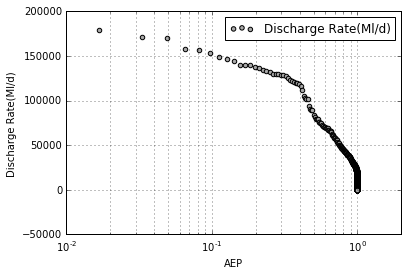

In [3]:
#working with dat after 1935 to obtain FFC
#sorting dataframe depending on the Discharge rate value (from higher to lower values)
Narrabi_FFC=thus.sort_values(['Discharge_rate'], ascending=False)
#add colum with the sorted places in the Dataframe
Narrabi_FFC['order']=range(1,len(Narrabi_FFC.index)+1)
#add column with calculated Exceedance probability (daily) according to Weibull equation
Narrabi_FFC['Exceedance_probability']=(Narrabi_FFC.order/(len(Narrabi_FFC.index)+1))
#add column with the reccurrency intervale (daily) according to Weibull formulae
Narrabi_FFC['recurrency_intervale']=((len(Narrabi_FFC.index)+1)/Narrabi_FFC.order)
#add column with the reccurrency intervale in years (dividing by 365 days)
Narrabi_FFC['recurrency_intervale_year']=Narrabi_FFC['recurrency_intervale']/365
#Add AEP colum according to formulae of the Bureau of Meteorology http://www.bom.gov.au/water/designRainfalls/ifd/glossary.shtml
Narrabi_FFC['AEP']=1 - np.exp(-1/Narrabi_FFC.recurrency_intervale_year)

#plotting options
#a
'''#plt.figure(1)
#plt.subplot(221)
#ax=Narrabi_FFC.plot.scatter(x='Exceedance_probability', y='Discharge_rate', color='Black', label='disch_rate (ML/d)')
#Narrabi_FFC.plot.scatter(x='Exceedance_probability', y= 'discharge_volume', color='DarkBlue', label='disch_vol(ML)', ax=ax )
#Narrabi_FFC.plot.scatter(x='Exceedance_probability', y= 'Level', color='DarkGrey', label='Level(m)', ax=ax )
#plt.xscale('log')
#plt.gca().invert_xaxis()
#plt.grid(which='both')
#pylab.xlim(0.000001,1)
#plt.xscale('linear')
#plt.show()'''

#b
#plt.subplot(222)
#define x, y and other properties
ay=Narrabi_FFC.plot.scatter(x='AEP', y= 'Discharge_rate', color='DarkGrey', label='Discharge Rate(Ml/d)')
#define scale of x
plt.xscale('log')
#invert x axis
plt.gca().invert_xaxis()
#add grid
plt.grid(which='both')
#set x axis limits
pylab.xlim(0.01,2)
#label of x axis
plt.xlabel('AEP')
#label of y axis
plt.ylabel('Discharge Rate(Ml/d)')
#show the plot
plt.show()


In [18]:
'''#consider in order to obtain model
#defining model to fit curve
def curve (x,c,n):
    return c*((x-0.32)**n)
popt, pcov = curve_fit(curve,Narrabi_FFC.Level,Narrabi_FFC.Discharge_rate)'''


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

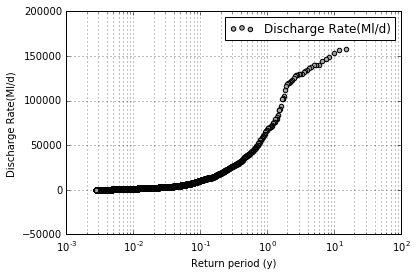

In [9]:
#ploting discharge rate v/s return periods instead
az=Narrabi_FFC.plot.scatter(x='recurrency_intervale_year', y= 'Discharge_rate', color='DarkGrey', label='Discharge Rate(Ml/d)')
#define scale of x
plt.xscale('log')
#invert x axis
plt.gca().invert_xaxis()
#add grid
plt.grid(which='both')
#set x axis limits
pylab.xlim(0.001,100)
#label of x axis
plt.xlabel('Return period (y)')
#label of y axis
plt.ylabel('Discharge Rate(Ml/d)')
#show the plot
plt.show()

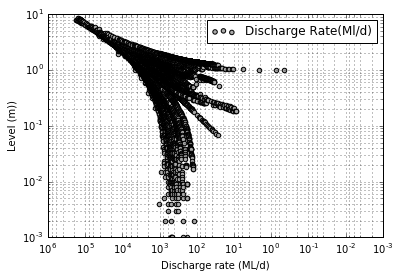

In [13]:
#ploting rating curve
azzz=Narrabi_FFC.plot.scatter(x='Discharge_rate', y= 'level_corrected', color='DarkGrey', label='Discharge Rate(Ml/d)')
#define scale of x
plt.xscale('log')
plt.yscale('log')
#invert x axis

plt.gca().invert_xaxis()
#add grid
plt.grid(which='both')
#set x axis limits
pylab.ylim(0.001,10)
#label of x axis
plt.xlabel('Discharge rate (ML/d)')
#label of y axis
plt.ylabel('Level (m))')
#show the plot
plt.show()

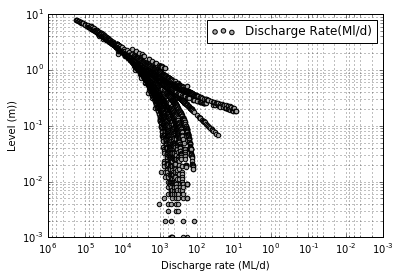

In [15]:
#working with data after 1975 
Narrabi_FFC_after=Thot.sort_values(['Discharge_rate'], ascending=False)
Narrabi_FFC_after['order']=range(1,len(Narrabi_FFC_after.index)+1)
Narrabi_FFC_after['Exceedance_probability']=(Narrabi_FFC_after.order/(len(Narrabi_FFC_after.index)+1))
Narrabi_FFC_after['recurrency_intervale']=((len(Narrabi_FFC_after.index)+1)/Narrabi_FFC_after.order)
Narrabi_FFC_after['recurrency_intervale_year']=Narrabi_FFC_after['recurrency_intervale']/365
#AEP formula according to the Bureau of Meteorology http://www.bom.gov.au/water/designRainfalls/ifd/glossary.shtml
Narrabi_FFC['AEP']=1 - np.exp(-1/Narrabi_FFC.recurrency_intervale_year)
###Exceedance probability
#plt.subplot(211)
#ay=Narrabi_FFC_after.plot.scatter(x='Exceedance_probability', y= 'Level', color='DarkGrey', label='Level(m)')
#plt.xscale('log')
#plt.gca().invert_xaxis()
#plt.grid(which='both')
#pylab.xlim(0.000001,1)

#plt.subplot(212)
#ax=Narrabi_FFC.plot.scatter(x='Exceedance_probability', y='Discharge_rate', color='Black', label='disch_rate (ML/d)')
### No conviene crear series Narrabi_FFC.plot.scatter(x='Exceedance_probability', y= 'discharge_volume', color='DarkBlue', label='disch_vol(ML)', ax=ax )
###Narrabi_FFC.plot.scatter(x='Exceedance_probability', y= 'Level', color='DarkGrey', label='Level(m)', ax=ax )
#plt.xscale('log')
#plt.gca().invert_xaxis()
#plt.grid(which='both')
#pylab.xlim(0.000001,1)
#plt.show()

###simple way
#def applyPlotStyle():
    #plt.xlabel('Exceedance Probability')
    #plt.gca().invert_xaxis()
    #plt.xscale('log')
    #pylab.xlim(0.000001,1)
    #plt.grid(True, which='both')
    
#f, axarr = plt.subplots(2, sharex=True)
#axarr[0].scatter(Narrabi_FFC_after.Exceedance_probability,Narrabi_FFC_after.Discharge_rate)
#applyPlotStyle()
#plt.grid(True, which='both')
#axarr[1].scatter(Narrabi_FFC_after.Exceedance_probability,Narrabi_FFC_after.Level)
#applyPlotStyle()
#plt.show()

###recurrency_intervale_year
#plt.subplot(211)
#ay=Narrabi_FFC_after.plot.scatter(x='recurrency_intervale_year', y= 'Level', color='DarkGrey', label='Level(m)')
#plt.xscale('log')
#plt.gca().invert_xaxis()
#plt.grid(which='both')
#plt.xlabel('Return period (years)')
#pylab.xlim(0.0001,100)

#plt.subplot(212)
#ax=Narrabi_FFC_after.plot.scatter(x='recurrency_intervale_year', y='level_corrected', color='Black', label='Level (m)')
#plt.gca().invert_xaxis()
#plt.xscale('log')
#plt.xlabel('Return period (years)')
#plt.grid(which='both')
#pylab.xlim(0.0001,100)
#plt.show()

#Rating curve
splited_RC=Narrabi_FFC_after.plot.scatter(x='Discharge_rate', y= 'level_corrected', color='DarkGrey', label='Discharge Rate(Ml/d)')
#define scale of x
plt.xscale('log')
plt.yscale('log')
#invert x axis

plt.gca().invert_xaxis()
#add grid
plt.grid(which='both')
#set x axis limits
pylab.ylim(0.001,10)
#label of x axis
plt.xlabel('Discharge rate (ML/d)')
#label of y axis
plt.ylabel('Level (m))')
#show the plot
plt.show()


In [9]:
#thinking in thresholds to obtain volumes. *Consider that Discharge volumes per day are equal to discharge rate in (ML/day)
'''#set threshold discharge rate value at an approximate AEP = 0.1
Discharge_rate_threshold=150000
#create new column called Flood volume
Narrabi_FFC['Flood_volume'] = 0.0
#logic operation to calculate flood volumes when discharge rate is higher that the threshold
logic = Narrabi_FFC['Discharge_rate'] > Discharge_rate_threshold 
#return the logic function to Flood Volumes when the logic condition is True 
Narrabi_FFC.loc[logic, 'Flood_volume'] =Narrabi_FFC.loc[logic,'discharge_volume']-Discharge_rate_threshold
'''

"#set threshold discharge rate value at an approximate AEP = 0.1\nDischarge_rate_threshold=150000\n#create new column called Flood volume\nNarrabi_FFC['Flood_volume'] = 0.0\n#logic operation to calculate flood volumes when discharge rate is higher that the threshold\nlogic = Narrabi_FFC['Discharge_rate'] > Discharge_rate_threshold \n#return the logic function to Flood Volumes when the logic condition is True \nNarrabi_FFC.loc[logic, 'Flood_volume'] =Narrabi_FFC.loc[logic,'discharge_volume']-Discharge_rate_threshold\n"

In [8]:
'''df = pd.DataFrame([[1,2],[3,4]], columns=['a','b'])
df['c'] = 0.0
logic = df['b'] > 3
df.loc[logic,'c'] = df.loc[logic,'b']-3
df'''

"df = pd.DataFrame([[1,2],[3,4]], columns=['a','b'])\ndf['c'] = 0.0\nlogic = df['b'] > 3\ndf.loc[logic,'c'] = df.loc[logic,'b']-3\ndf"